### Table of content
1. [EDA](#2)
1. [Data Visulization](#4)
1. [Logistic Regression using Gradient Descent ](#6)
1. [Logistic Regression using Mini-batch SGD](#8)
1. [Logistic Regression using SGD with momentum](#10)
1. [Logistic Regression using using sklearn](#12)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression/Social_Network_Ads.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
df=pd.read_csv('/kaggle/input/logistic-regression/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# EDA<a id=2></a>

In [5]:
# Drop User id
len(df['User ID'].unique())
df.drop(columns=['User ID'],inplace=True)

In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
#conert categorical feature to numarical feature
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [10]:
#Normalize the data
sc=MinMaxScaler()
df_n=sc.fit_transform(df.iloc[:,:-1])

In [11]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(df_n,df['Purchased'])
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
x=x_train
y=y_train

# Data Visulization<a id=4></a>

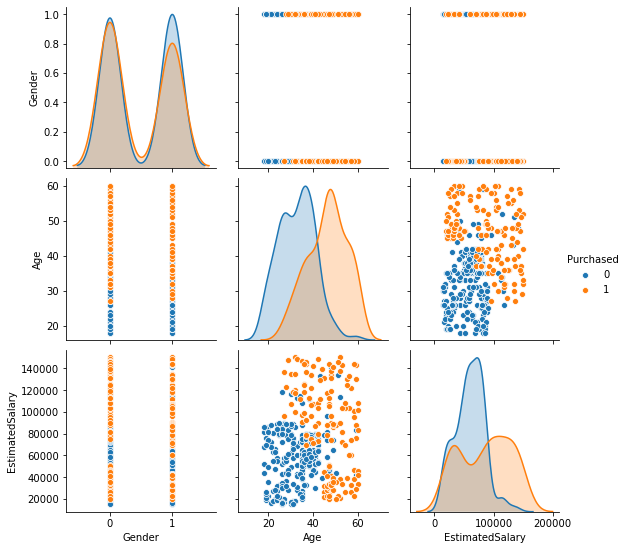

In [12]:
#pairplot
sns.pairplot(df,hue='Purchased')

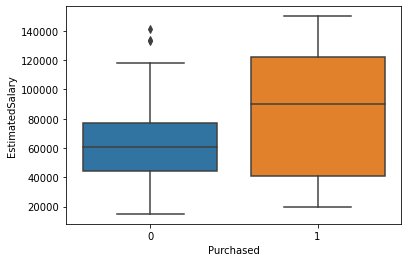

In [13]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=df)

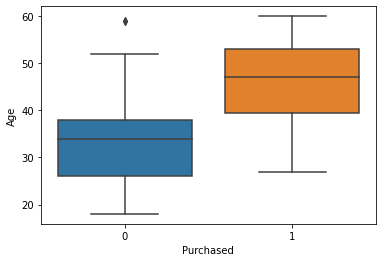

In [14]:
sns.boxplot(x='Purchased',y='Age',data=df)

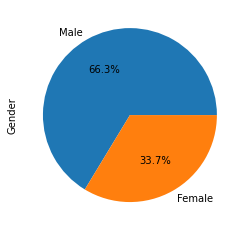

In [15]:
#pie plot
df_gender=df[['Gender','Purchased']].groupby('Purchased').sum()
df_gender.index=['Male','Female']
df_gender['Gender'].plot(kind='pie',autopct='%1.1f%%')
plt.show()

# Logistic Regression using Gradient Descent <a id=6></a>

In [16]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))
def loss(x,w,y,b):
    s=sigmoid(x,w,b)
    return np.mean(-(y*np.log(s))- ((1-y)*np.log(1-s)))
def grad(x,y,w,b):
    s=sigmoid(x,w,b)    
    return np.dot(x.T,(s-y))/x.shape[0]

In [17]:
def accuracy(y_pred,y_test):
    return np.mean(y_pred==y_test)

In [18]:
# initilize w and b
def gradientdescent(x,y):
    w=np.zeros((x.shape[1]))
    b=np.zeros(1)
    ite=1000 #number of iteration
    eta=0.7 #learning rate
    loss_v=[]
    for i in range(ite):
        probability=sigmoid(x,w,b)
        l=loss(x,w,y,b)
        gradient=grad(x,y,w,b)
        w=w- (eta*gradient)
        b=b-(eta*np.sum(probability-y)/x.shape[0])
        loss_v.append(l)
        if i%100==0:
            print(l)
    return w,b,loss_v

In [19]:
w,b,loss_v=gradientdescent(x,y)
y_pred=sigmoid(x_test,w,b)
for j,i in enumerate(y_pred):
    if i<0.5:
        y_pred[j]=0
    else:
        y_pred[j]=1

print('test accuracy',accuracy(y_pred,y_test))

0.6931471805599467
0.46824620053813504
0.41373079197199336
0.3897267439098201
0.37674477979951454
0.36885655071698165
0.363696412749435
0.36014577026616207
0.3576113857482108
0.35575160674492456
test accuracy 0.86


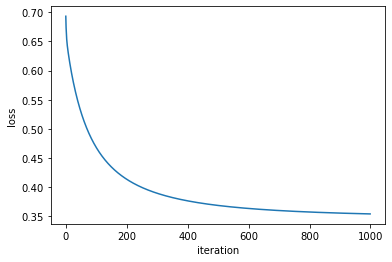

In [20]:
plt.plot(range(len(loss_v)),loss_v)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# Logistic Regression using Mini-batch SGD<a id=8></a>

In [25]:
batch_size=8
def sgd(x,y,batch_size):
    # initilize w and b
    w=np.zeros((x_train.shape[1]))
    b=np.zeros(1)
    ite=1000 #number of iteration
    eta=0.7 #learning rate
    loss_v=[]
    for i in range(1000):
        ind=np.random.choice(len(y_train),batch_size)
        x_b=x[ind]
        y_b=y[ind]
        p=sigmoid(x_b,w,b)
        l=loss(x_b,w,y_b,b)
        gradient=grad(x_b,y_b,w,b)
        w=w- (0.1*gradient)
        b=b-(eta*np.sum(p-y_b)/x.shape[0])
        if i%10==0:
            loss_v.append(l)
        if i%100==0:
            print('loss',l)
    return w,b,loss_v

In [26]:
w,b,loss_v=sgd(x,y,32)
y_pred=sigmoid(x_test,w,b)
for j,i in enumerate(y_pred):
    if i<0.5:
        y_pred[j]=0
    else:
        y_pred[j]=1

print('test accuracy',accuracy(y_pred,y_test))

loss 0.6931471805599448
loss 0.6278149588111854
loss 0.6035356489914048
loss 0.4881741340927539
loss 0.5486975396008116
loss 0.4963472981460031
loss 0.4807055091535177
loss 0.5649417248839724
loss 0.4608513419074556
loss 0.5171429870812208
test accuracy 0.84


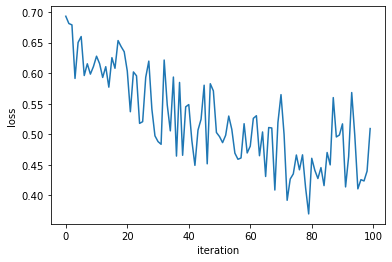

In [27]:
plt.plot(range(len(loss_v)),loss_v)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# Logistic Regression using SGD with momentum<a id=10></a>

In [28]:
batch_size=8
def sgdmomentum(x,y,batch_size):
    # initilize w and b
    w=np.zeros((x_train.shape[1]))
    b=np.zeros(1)
    ite=1000 #number of iteration
    eta=0.7 #learning rate
    alpha=0.9
    loss_v=[]
    v_t=np.zeros((x_train.shape[1])) 
    v_b=np.zeros(1)
    for i in range(1000):
        ind=np.random.choice(len(y_train),batch_size)
        x_b=x[ind]
        y_b=y[ind]
        p=sigmoid(x_b,w,b)
        l=loss(x_b,w,y_b,b)
        gradient=grad(x_b,y_b,w,b)
        v_t =(alpha*v_t) + (eta*gradient)
        w=w-v_t
        v_b=(alpha*v_b) + (eta*np.sum(p-y_b)/x.shape[0])
        b=b-v_b
        if i%10==0:
            loss_v.append(l)
        if i%100==0:
            print('loss',l)
    return w,b,loss_v

In [29]:
w,b,loss_v=sgdmomentum(x,y,32)

loss 0.6931471805599448
loss 0.4220835670845099
loss 0.2941736243371927
loss 0.44537673992679633
loss 0.2871349895011394
loss 0.6241278912840013
loss 0.34683687828696796
loss 0.18828219280440267
loss 0.4223695477823046
loss 0.34499265763927867


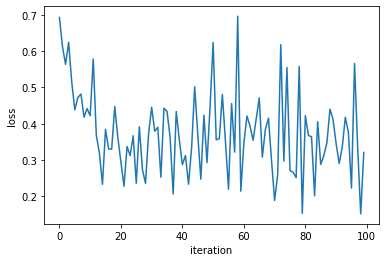

In [30]:
plt.plot(range(len(loss_v)),loss_v)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [32]:
#Predction
y_pred=sigmoid(x_test,w,b)
for j,i in enumerate(y_pred):
    if i<0.5:
        y_pred[j]=0
    else:
        y_pred[j]=1

print('test accuracy',accuracy(y_pred,y_test))

test accuracy 0.86


# Logistic Regression using Using sklearn<a id=12></a>

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model= LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('test accuracy',accuracy(y_pred,y_test))

test accuracy 0.82
